This code uses Transfer Learning with the VGG16 model to classify images in the CIFAR-10 dataset, a popular dataset containing small images of 10 different classes (e.g., airplane, automobile, bird). The code trains a custom classifier on top of VGG16 to identify these classes. 

TensorFlow and Keras: Used for building and training the neural network.
VGG16: A pre-trained Convolutional Neural Network model.

    Pre-trained on ImageNet, a dataset of over a million images across 1,000 classes.
    Used here for transfer learning to save time and resources.

CIFAR-10: The dataset being used.
NumPy: For numerical operations.
Matplotlib: For visualizing the images and predictions.

In [24]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

Loading the Data:

    cifar10.load_data() loads the dataset:
        Training set: x_train (images) and y_train (labels).
        Test set: x_test (images) and y_test (labels).

Scaling the Pixel Values:

    Divide by 255.0 to normalize the pixel values to a range of 0-1 for better model performance.

One-Hot Encoding the Labels:

    to_categorical() converts labels like 3 into a vector: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
    CIFAR-10 has 10 classes, so each label becomes a vector of length 10.

In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 695s 4us/step


In [26]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


VGG16:

    weights='imagenet': Uses pre-trained weights from the ImageNet dataset.
    include_top=False: Excludes the fully connected (classification) layers.
    input_shape=(32, 32, 3): Adjusts the input shape to match CIFAR-10 images.

Freezing the Base Model:

    base_model.trainable = False: Prevents the pre-trained layers from being updated during training.

In [27]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [28]:
base_model.trainable = False

Adding Custom Classification Layers

In [29]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

Adam: Optimization algorithm to minimize the loss during training.
categorical_crossentropy: Loss function for multi-class classification.
accuracy: Metric to evaluate the model’s performance.

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 130ms/step - accuracy: 0.4652 - loss: 1.5373 - val_accuracy: 0.5501 - val_loss: 1.2706
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 134ms/step - accuracy: 0.5802 - loss: 1.2021 - val_accuracy: 0.5805 - val_loss: 1.1969


In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 - 35s - 112ms/step - accuracy: 0.5805 - loss: 1.1969
Test Accuracy: 0.58


In [33]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [34]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

random_index: Randomly selects an image from the test set.
random_image: The selected test image.
random_label: The true class of the image (converted back from one-hot encoding using np.argmax).

In [35]:
random_index = np.random.randint(len(x_test))
random_image = x_test[random_index]
random_label = np.argmax(y_test[random_index]) 

np.expand_dims: Adds an extra dimension to match the model's input format: (1, 32, 32, 3).
model.predict: Predicts the probabilities for each class.
np.argmax: Finds the class with the highest probability.

In [36]:
predicted_probabilities = model.predict(np.expand_dims(random_image, axis=0))
predicted_class = np.argmax(predicted_probabilities)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


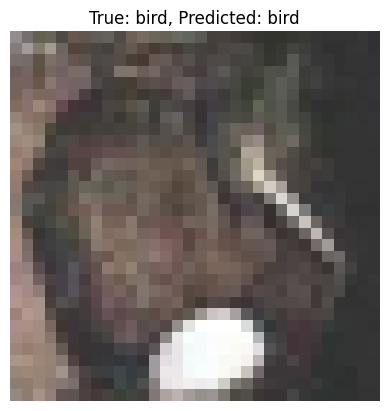

In [37]:
plt.imshow(random_image)
plt.title(f"True: {class_names[random_label]}, Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()
